In [63]:
# imports

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

import matplotlib.pyplot as plt
import seaborn as sns

plot_style = {
    # For latex-quality, i.e., publication quality legends and labels on graphs.
    # Warning: you must have installed LaTeX on your system. Else set it to False.
    "text.usetex": True, 
    
    # configure fonts
    "font.size":12,             # default font size
    "font.family":'serif',
    "legend.fontsize": 10,
    "axes.labelsize": 10,
    "axes.titlesize":14,
    "xtick.labelsize" : 8,
    "ytick.labelsize" : 8,
    
    # configure figure
    "figure.dpi": 144,
    "figure.figsize":'10,5',
    "figure.titlesize":14
}


In [2]:
X = np.load('X_pca.npy')
X_raw = np.load('X.npy')
X_log = np.log2(X_raw+1)

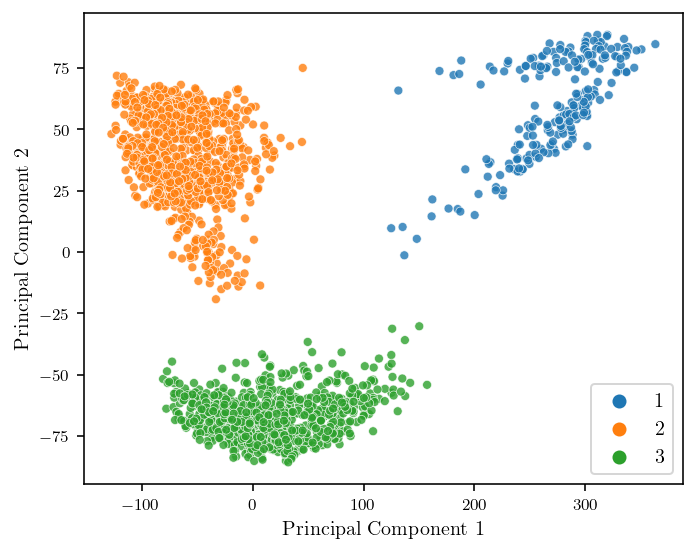

In [165]:
plot_style["figure.figsize"] = '5, 4'
plt.style.use ('default')                      # emulate ggplot style
plt.rcParams.update(plot_style)

sns.scatterplot(x=X[:,0], y=X[:,1],
                hue=labels, alpha=0.8,s=20, palette='tab10', 
                legend='auto' )
# plt.scatter(X[:,0], X[:, 1], color=colors, 
#                alpha=0.8,  s=5 )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');
plt.tight_layout();

plt.savefig('TSNE/PCA.pdf')

In [42]:
labels = np.load('hierarchical_clustering/ward_linakge_t-2000_labels.npy')

In [95]:
colors = [plt.cm.tab10(i-1) for i in labels]

In [27]:
X.shape[0]/12

180.75

In [23]:
lrs = [1, 10, 100, 500, 4500, 5000]
perplexity = 35.0
pcs = 1000

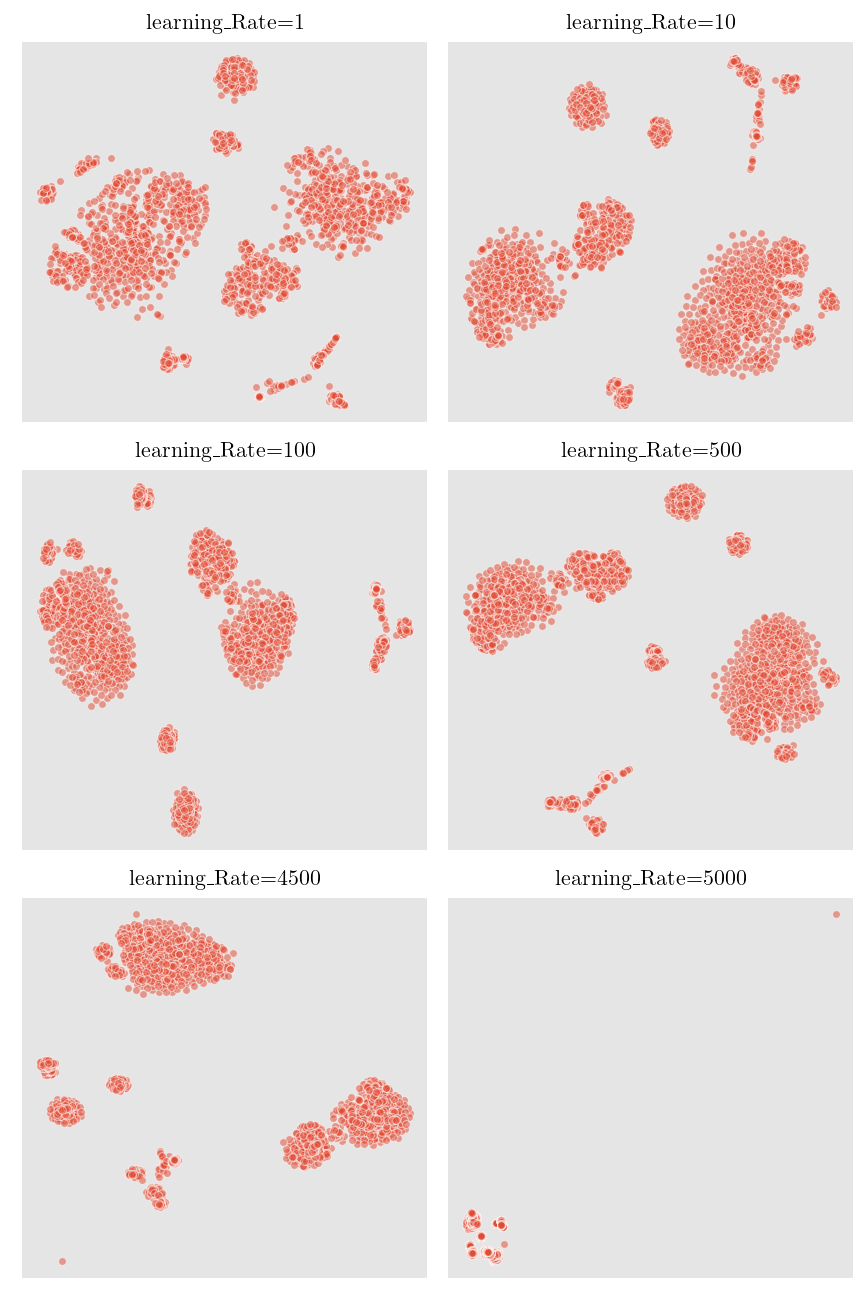

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_figure'

In [24]:
plot_style["figure.figsize"] = '6, 9'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

fig, axs = plt.subplots(3, 2)

for i, lr in enumerate(lrs):
    x = (i)//2
    y = (i)%2
    X_embedded = TSNE(n_components=2, 
                      learning_rate=lr, 
                      init='random', 
                      perplexity=perplexity,
                      n_iter=300,
                      early_exaggeration=12.0,
                     ).fit_transform(X[:, :pcs])
    ax = axs[x][y]
    ax.scatter(X_embedded[:, 0],
               X_embedded[:, 1],s=15, 
               alpha=0.5, 
               edgecolors={'white'}, 
              )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(f"learning_Rate={lr}", size=11)
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
plt.show()

plt.savefig('TSNE/TSNE_learning_rate_effect.pdf')

In [135]:
n_its = [250, 260, 270, 275, 300, 500]
perplexity = 40.0
pcs = 500

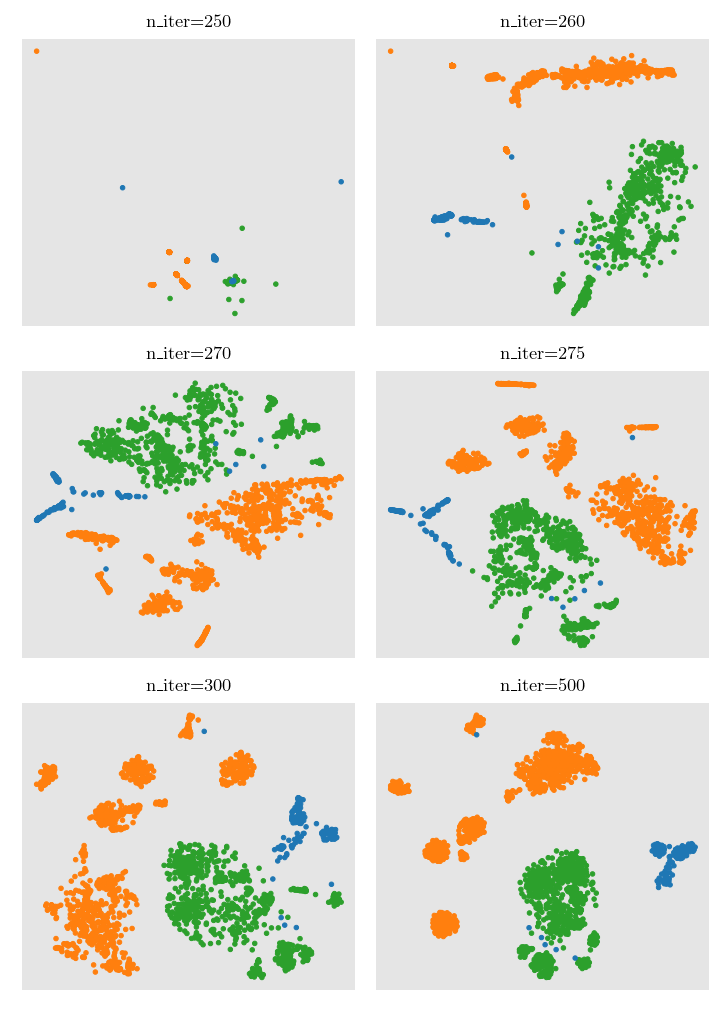

In [136]:
plot_style["figure.figsize"] = '5, 7'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

fig, axs = plt.subplots(3, 2)

for i, it in enumerate(n_its):
    x = (i)//2
    y = (i)%2
    X_embedded = TSNE(n_components=2, 
                      learning_rate=200, 
                      init='random', 
                      perplexity=perplexity,
                      n_iter=it,
                      early_exaggeration=10.0,
                     ).fit_transform(X[:, :pcs])
    ax = axs[x][y]
    ax.scatter(X_embedded[:, 0],
               X_embedded[:, 1],s=5, 
               color=colors
              )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(f"n_iter={it}", size=9)
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
plt.show()

fig.savefig('TSNE/TSNE_n_iters.pdf')

In [141]:
ees = [1, 20, 50]
perplexity = 40.0
pcs = 500

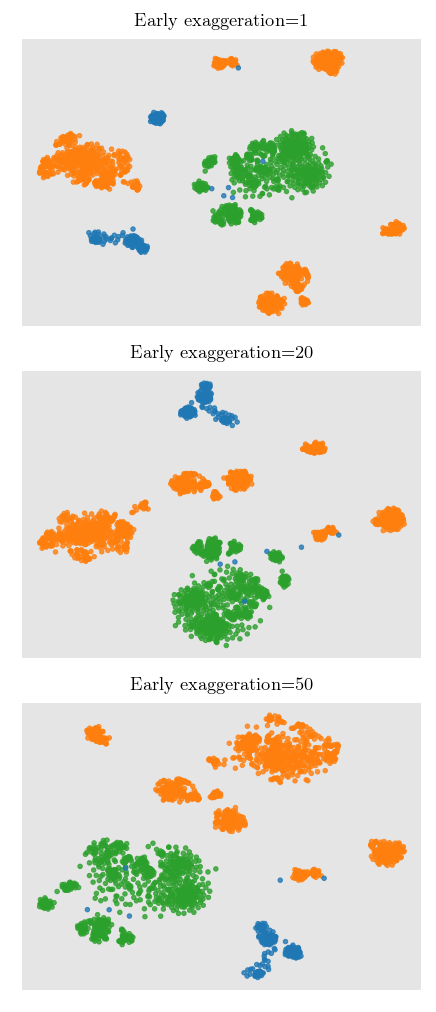

In [145]:
plot_style["figure.figsize"] = '3, 7'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

fig, axs = plt.subplots(3, 1)

for i, ee in enumerate(ees):
    X_embedded = TSNE(n_components=2, 
                      learning_rate=200, 
                      init='random', 
                      perplexity=perplexity,
                      n_iter=500,
                      early_exaggeration=ee
                     ).fit_transform(X[:, :pcs])
    ax = axs[i]
    ax.scatter(X_embedded[:, 0],
               X_embedded[:, 1],s=5, 
               color=colors,
               alpha=0.8
              )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(f"Early exaggeration={ee}", size=9)
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
plt.show()

# fig.savefig('TSNE/TSNE_early_exageration.pdf')

In [133]:
ees = [1, 12, 50]
n_its = [250, 275, 500]
perplexity = 40.0
pcs = 500

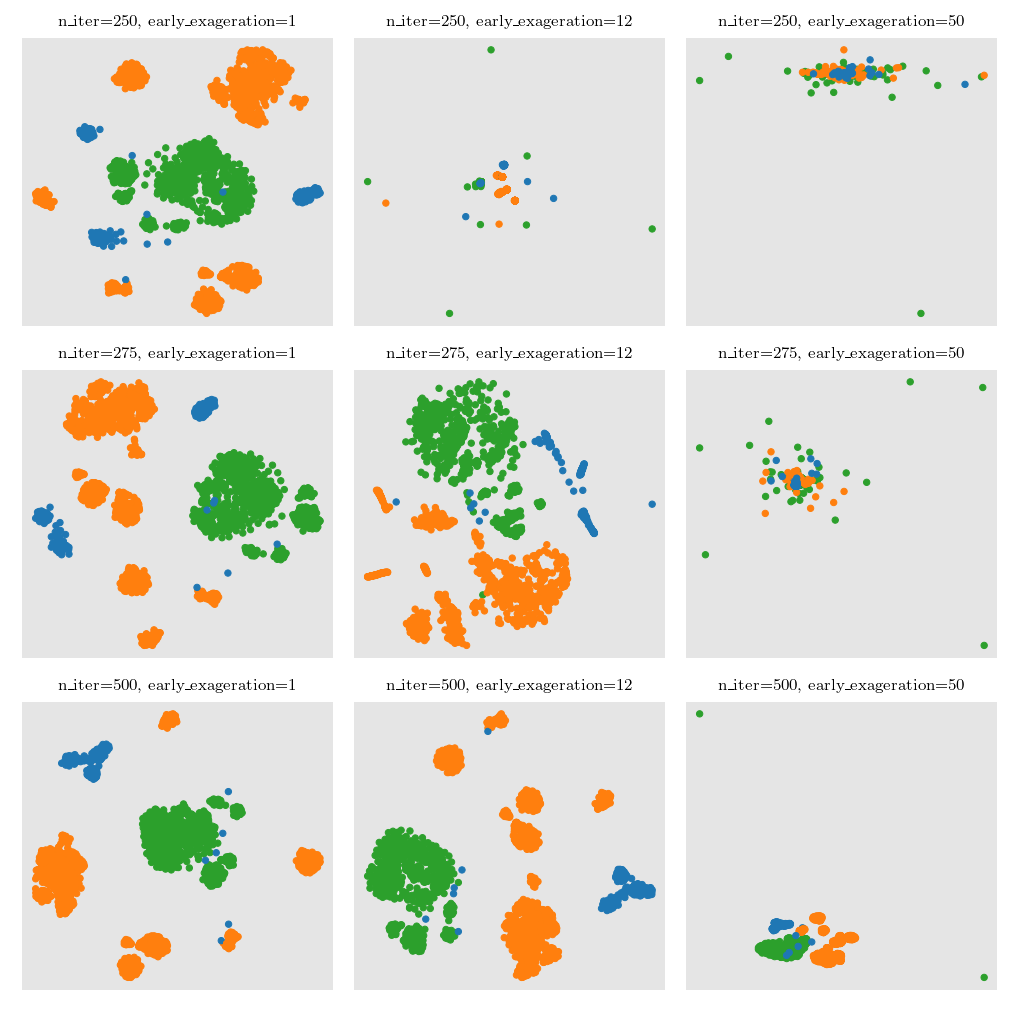

In [134]:
plot_style["figure.figsize"] = '7, 7'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

fig, axs = plt.subplots(3, 3)

for i, it in enumerate(n_its):
    for j, ee in enumerate(ees):
        X_embedded = TSNE(n_components=2, 
                          learning_rate=200, 
                          init='random', 
                          perplexity=perplexity,
                          n_iter=it,
                          early_exaggeration=ee,
                         ).fit_transform(X[:, :pcs])
        ax = axs[i][j]
        ax.scatter(X_embedded[:, 0],
                   X_embedded[:, 1],s=10,  
                   color=colors
                  )
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(f"n_iter={it}, early_exageration={ee}", size=8)
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
plt.show()

fig.savefig('TSNE/TSNE_n_iter_early_exaggeration.pdf')

In [166]:


X_embedded = TSNE(n_components=2, 
                  learning_rate=200, 
                  init='random', 
                  perplexity=100.0,
                  n_iter=1000,
                  early_exaggeration=12,
                 ).fit_transform(X[:, :pcs])

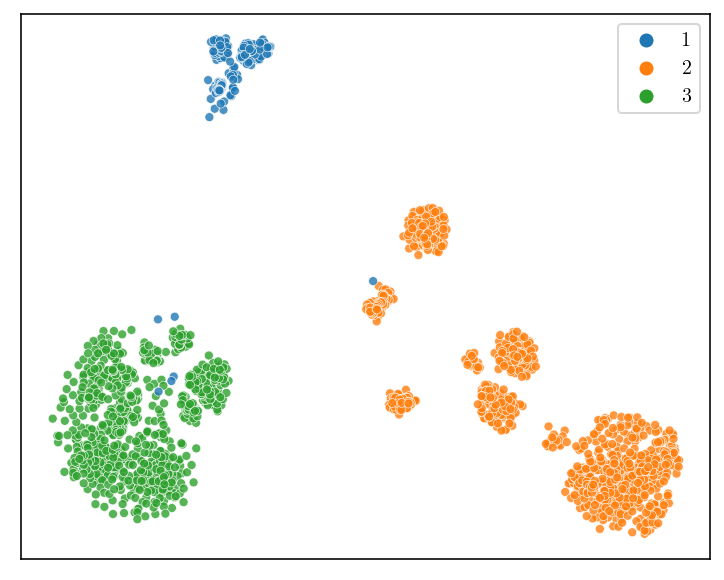

In [167]:
plot_style["figure.figsize"] = '5, 4'
plt.style.use ('default')                      # emulate ggplot style
plt.rcParams.update(plot_style)

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],
                hue=labels, alpha=0.8,s=20, palette='tab10', 
                legend='auto' )
plt.yticks([])
plt.xticks([])
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
plt.savefig('TSNE/TSNE_1000.pdf')
plt.show()

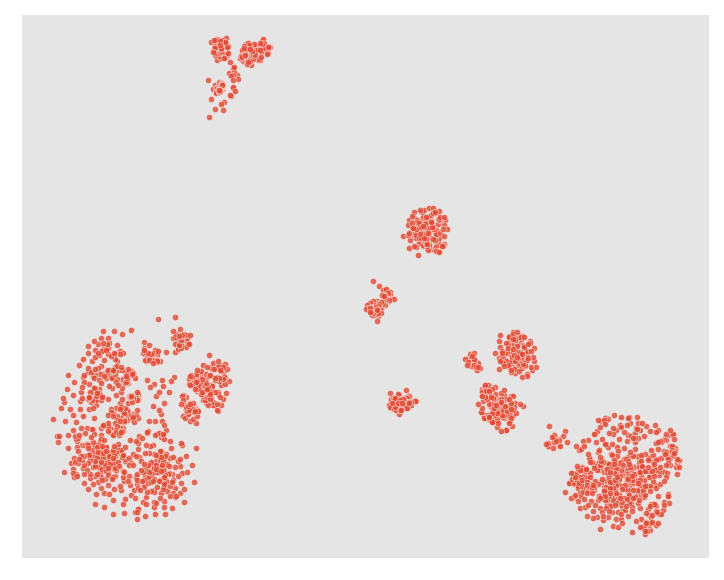

In [176]:
plot_style["figure.figsize"] = '5, 4'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],
#                 hue=labels, 
                alpha=0.8,
                s=10, 
#                 palette='tab10', 
                legend='auto' )
plt.yticks([])
plt.xticks([])
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
plt.savefig('TSNE/TSNE_1000.pdf')

plt.show()

